<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/clustering_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering


```
**in clustering we dont have dependent variable and we must create that one.**
```



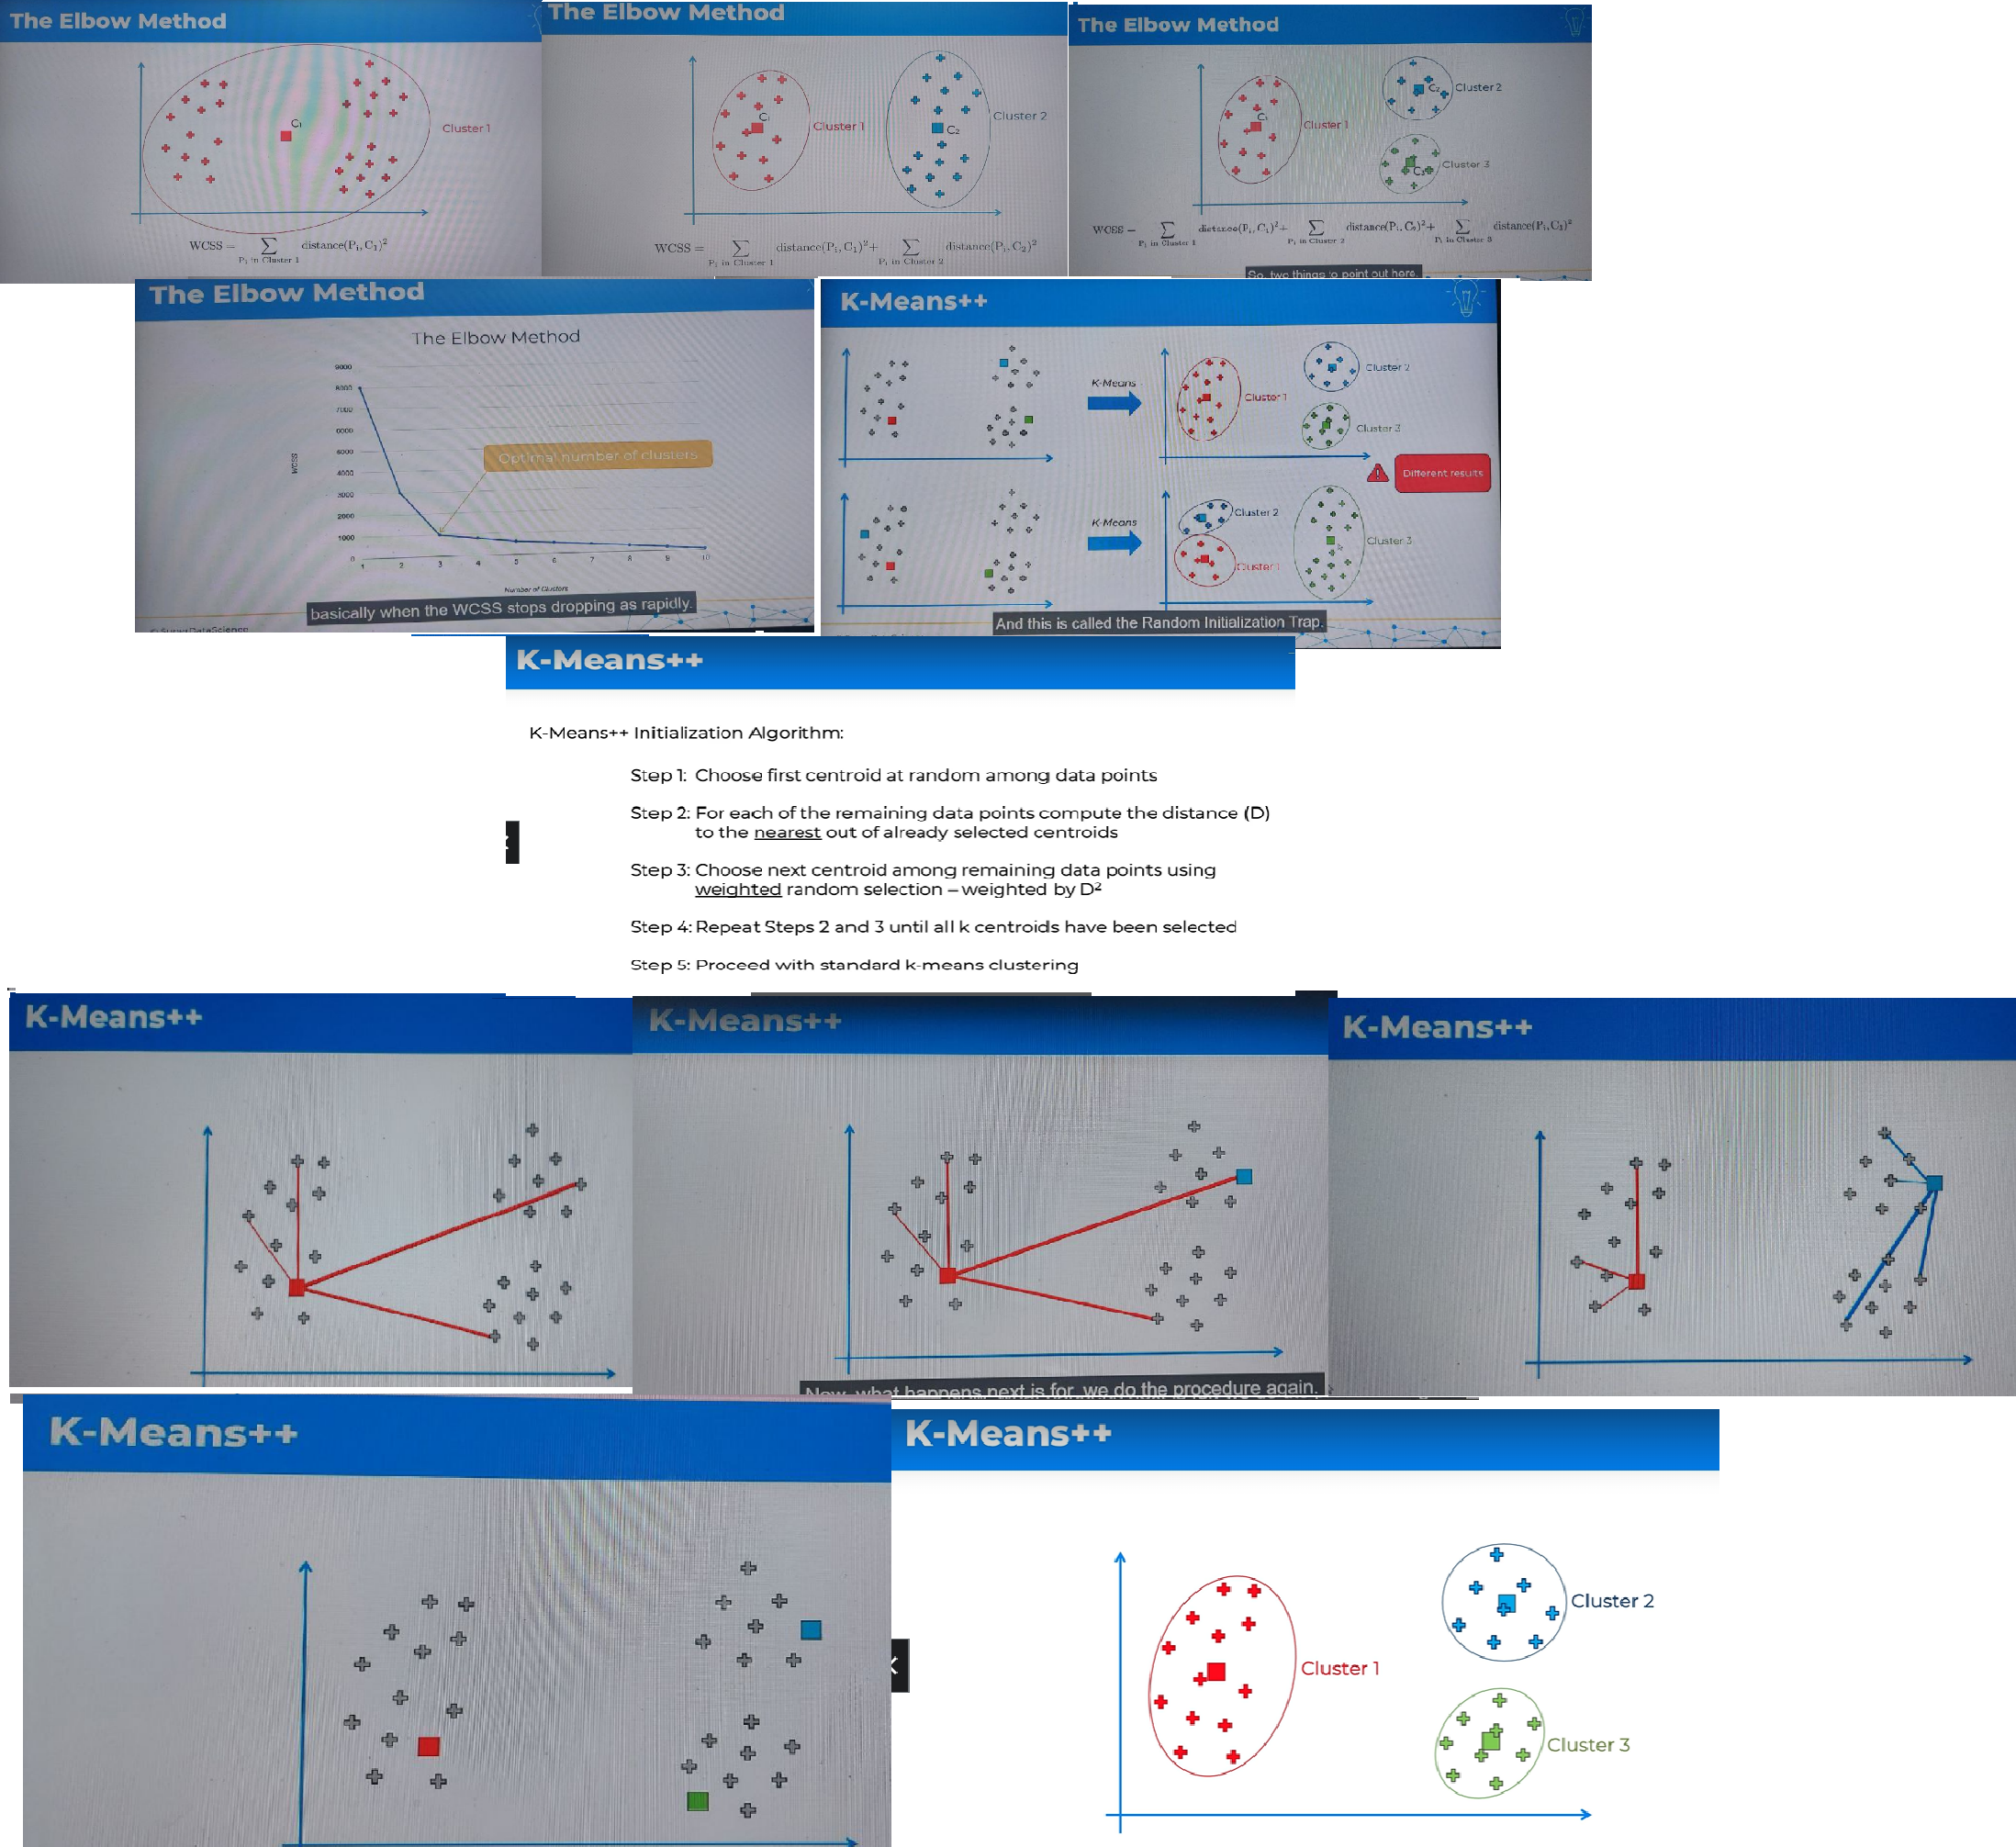

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset


```
to do clustering we dont have a dependent variable(Y),and also just I have to select a benefit variable that help us to do clustering well, so just I slect "annual Income" and"spending score" features, because for visualizing the clustering just we must have 2 dimensions ,one of that for X and one of that for y axis.so we just use of [3,4]
```



In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part4-Clustering/Section24-k-Mean-clustering/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # or [:,3:4]

## Using the elbow method to find the optimal number of clusters


```
to do the Elbow method (wcss),we should run several time the K-Mean algorithm.and X-axis is the number of ckuster and y-axis is wcss.

we use of the Elbow method to determind homw many partition we can have to do the best clusternig, and whn we plot ots we know that point doesn't be less  any more ,it shows the number of clustering tha would be a best numbers.
```



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

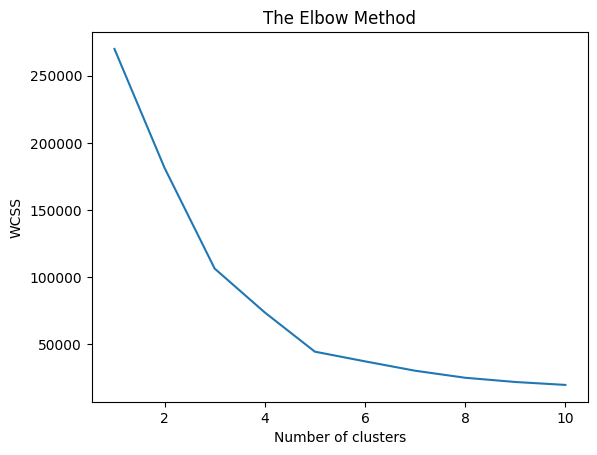

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): #10 is number of cluster
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # we want to initialize the clustering with k-mean method to  avoid of "random initializing trap"
    kmeans.fit(X) #training
    wcss.append(kmeans.inertia_)  # list all wscc values(which is in inertia parameter)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset


```
when we noticed how many clustering is the best, (in the above plot 5(in the x-axis) is the best number of clustering because decresing in the plot are slowly ), then we use of that number of clusterng to predict new Y and create new dependent variable  by fit_predict
```



In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) #fit_predict=> train the model with 5 clustering and produve dependent variables(y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

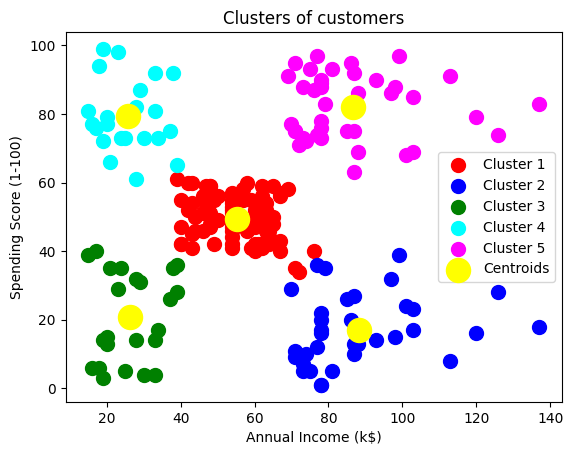

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #x_axis [y_kmeans == 0 => rows that corespond to 0 clustering, 0=> column 0th] , y_axis,size ==> plot 0th cluster
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #plot second cluster
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()